In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt


### Make plots bigger

import seaborn as sns

In [3]:
sns.set(style='whitegrid', rc={'figure.figsize':(20.7,8.27)})

from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor
from pdkit.utils import butter_lowpass_filter

import scipy.signal as sig
import pywt

clean_data = '~/data/pdkit/GAIT_-_2018-06-14_13-50-58_-_d90b653403_-_13311.csv'

gd = GaitTimeSeries.load_data(clean_data, format_file='gait_gyro')

Sampling rate is 499.6666666666667 Hz
Sampling rate is 499.6666666666667 Hz


/home/c/lab/envs/pdkit/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
gp = GaitProcessor(sampling_frequency=50.0, filter_order=4, cutoff_frequency=2.0)

d = gp.resample_signal(gd)

In [5]:
df = gp.filter_data_frame(d, centre=True)

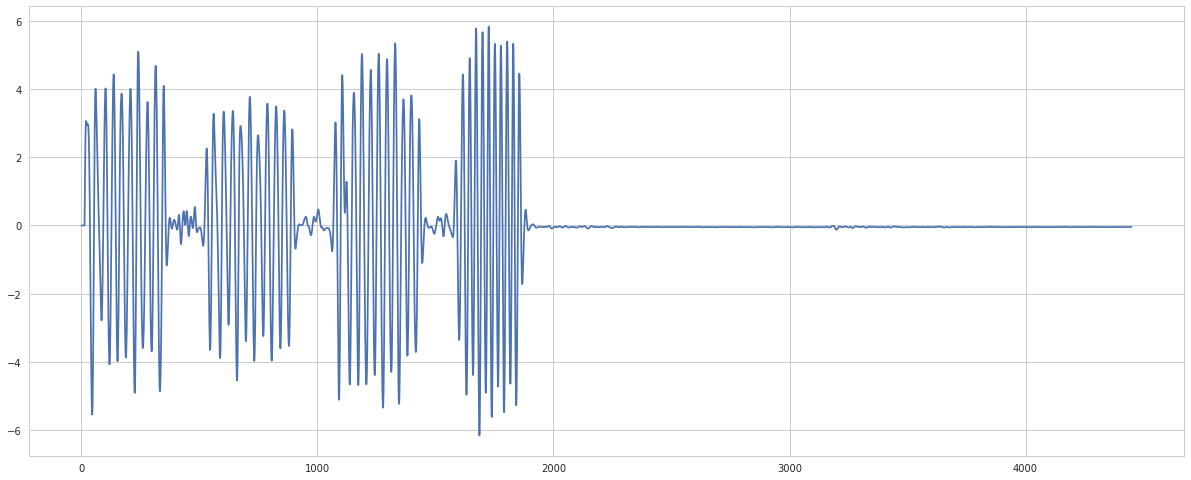

In [6]:
# let's work on magnitude data from now on...
data = df.mag_sum_acc.values
plt.plot(data)

In [7]:
import sklearn.cluster as cluster
import tslearn.clustering as tscluster

In [8]:
ms = cluster.MeanShift(bin_seeding=False)

In [9]:
ac = cluster.AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

In [23]:
sc = cluster.SpectralClustering(n_clusters=3, eigen_solver='arpack', affinity="nearest_neighbors", gamma=0.1)
#sc = cluster.SpectralClustering(n_clusters=6, eigen_solver='arpack', affinity="rbf", gamma=0.1)

In [11]:
ap = cluster.AffinityPropagation(damping=0.5)#, preference=params['preference'])

In [12]:
b = cluster.Birch(n_clusters=6)

In [13]:
dbs = cluster.DBSCAN(eps=1)

In [14]:
def plot_clusters(data, clustering):
    CLR = ['red', 'green', 'blue', 'yellow', 'magenta', 'orange', 'purple'] * 10
    peaks, _ = sig.find_peaks(data)
    prominences = sig.peak_prominences(data, peaks)[0]
    
    clusters = clustering(prominences.reshape(-1, 1))
    
    contour_heights = data[peaks] - prominences
    colors = [CLR[i] for i in clusters]
    plt.plot(data)
    plt.scatter(peaks, data[peaks], color=colors)
    plt.vlines(x=peaks, ymin=contour_heights, ymax=data[peaks], color=colors)
    
    return peaks, prominences, clusters

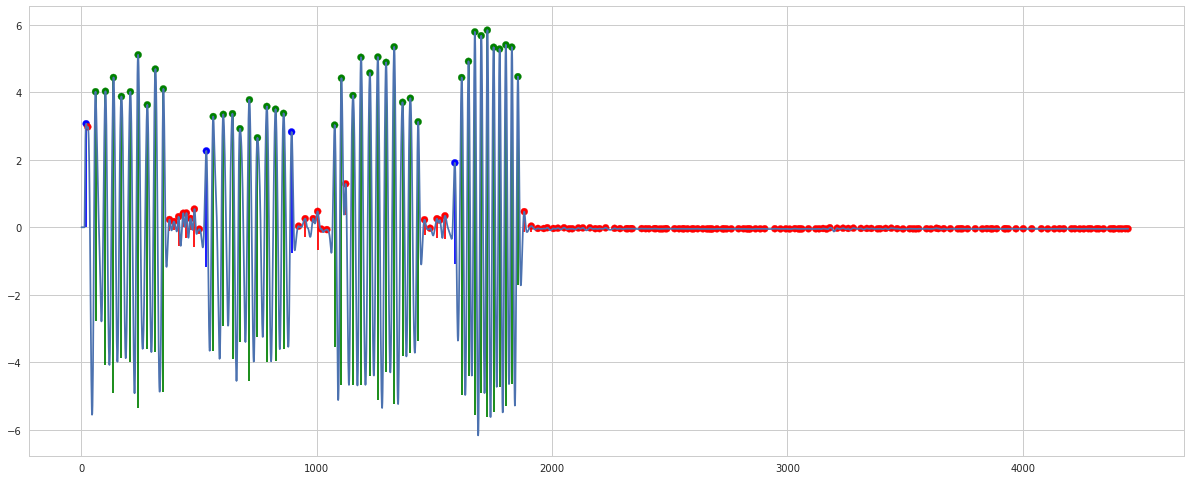

In [15]:
plot_clusters(data, ms.fit_predict);

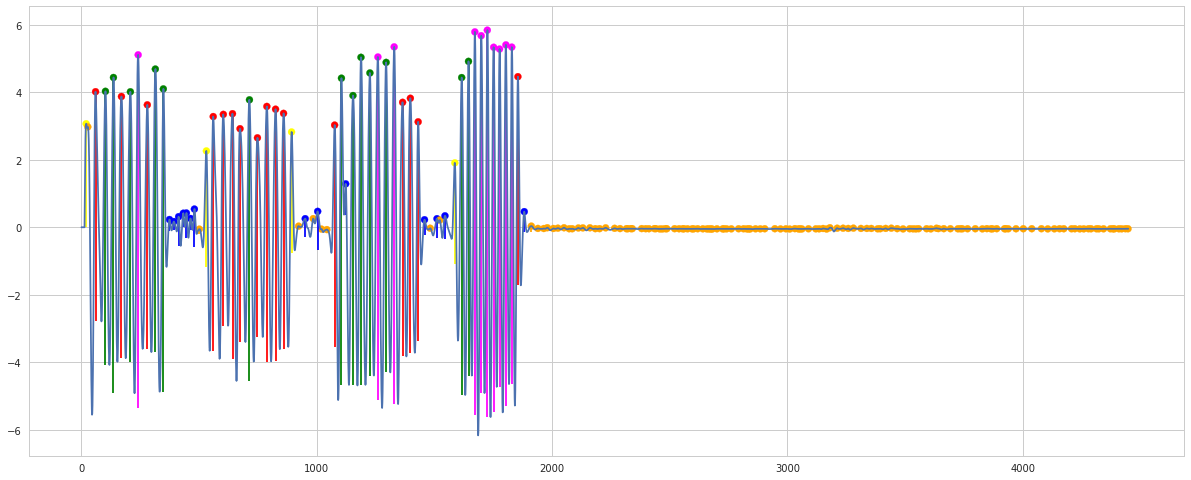

In [16]:
plot_clusters(data, ac.fit_predict);

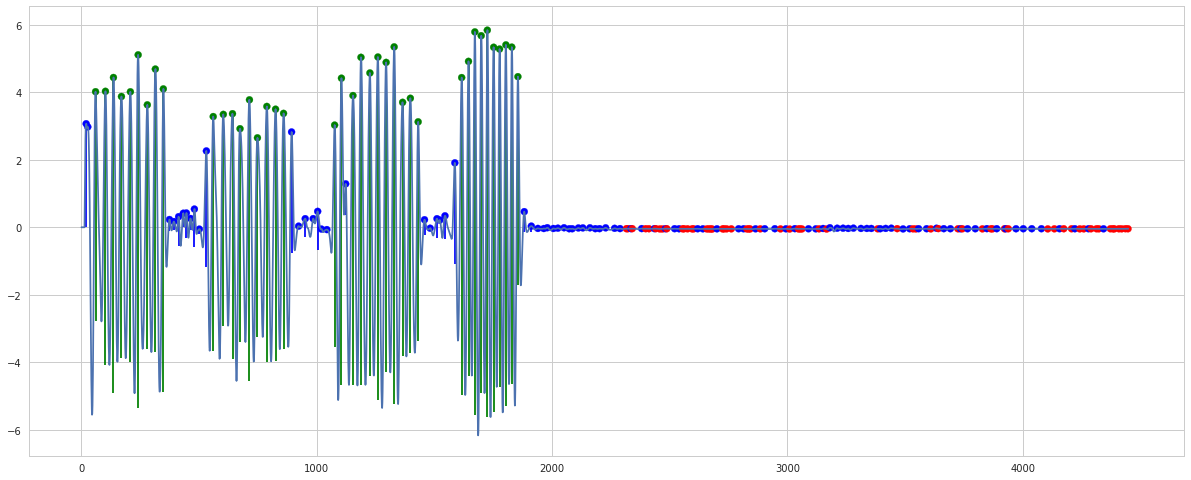

In [24]:
plot_clusters(data, sc.fit_predict);

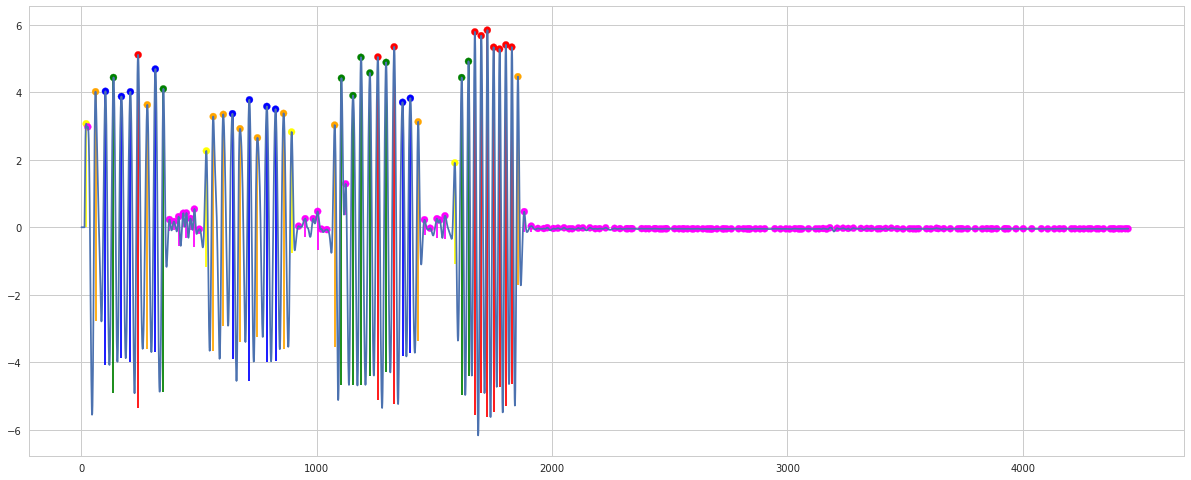

In [25]:
plot_clusters(data, b.fit_predict);

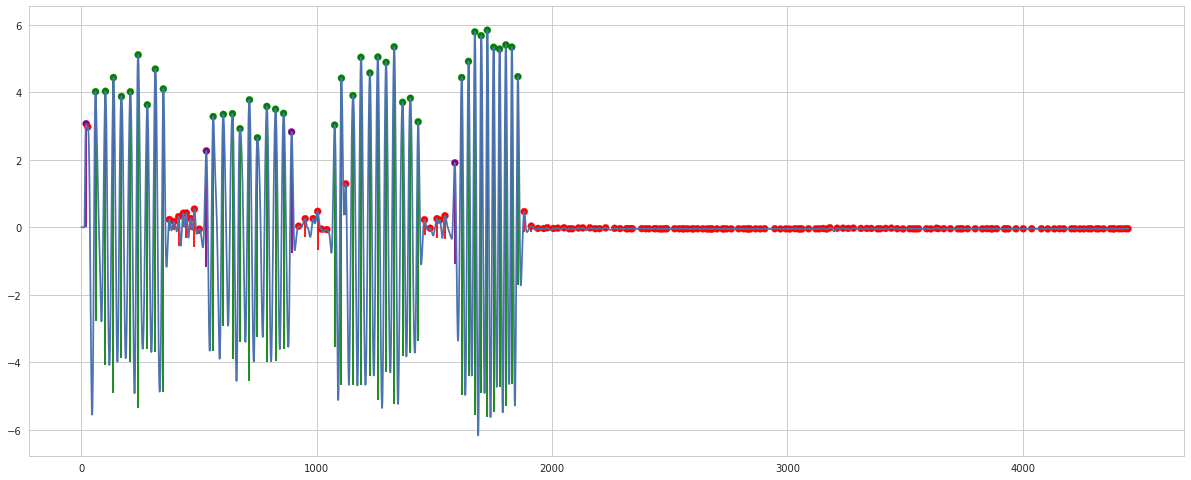

In [26]:
plot_clusters(data, dbs.fit_predict);

In [27]:
tskm = tscluster.TimeSeriesKMeans(n_clusters=6, metric='dtw', tol=0.1, dtw_inertia=False)

0.072 --> 0.065 --> 


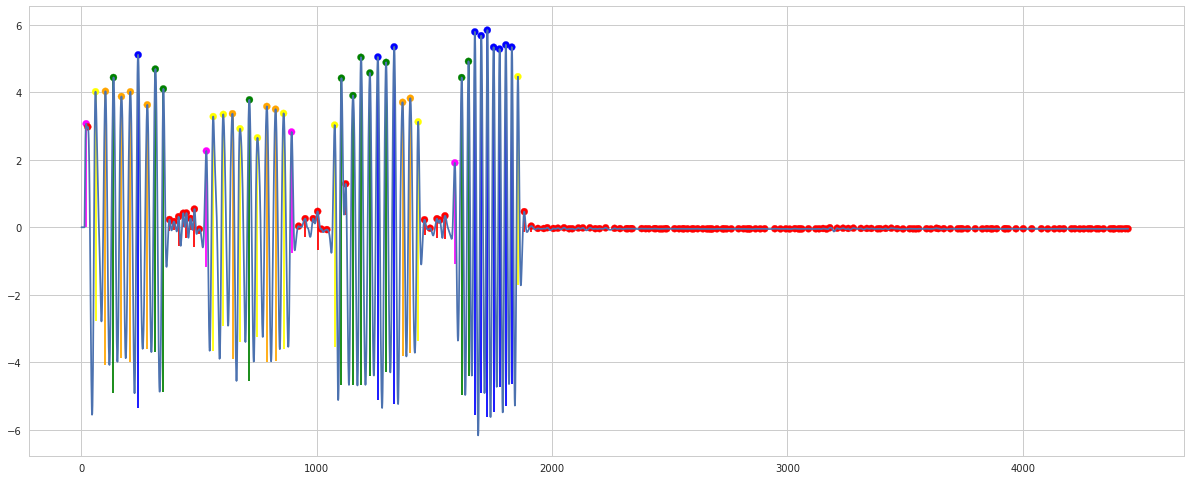

In [28]:
plot_clusters(data, tskm.fit_predict);

In [35]:
gakm = tscluster.GlobalAlignmentKernelKMeans(n_clusters=6, sigma=0.5, n_init=100, verbose=False)

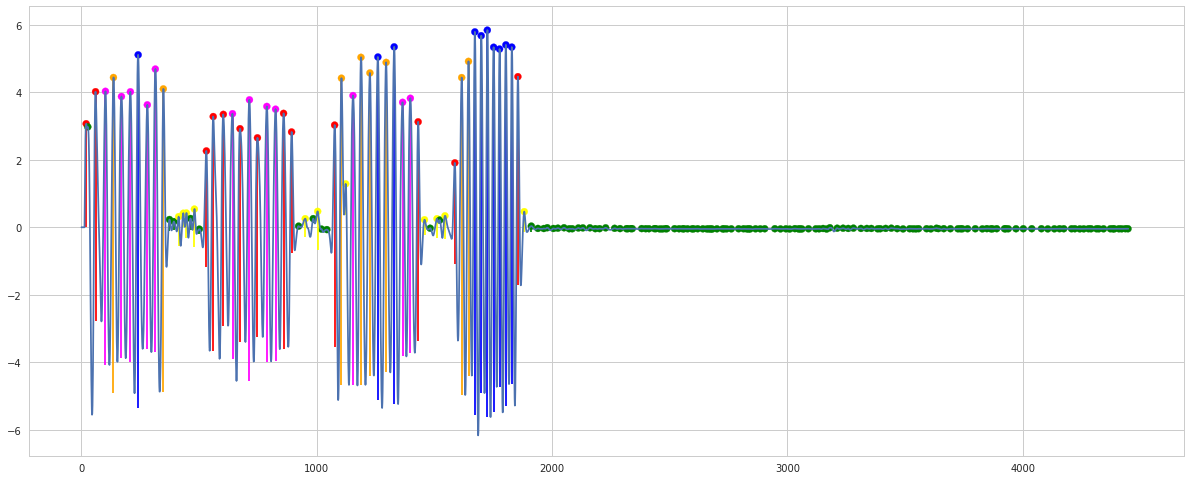

In [36]:
ppc = plot_clusters(data, gakm.fit_predict)

In [37]:
peaks, promi, clu = ppc

In [38]:
clu

array([0, 1, 0, 4, 5, 4, 4, 2, 4, 4, 5, 1, 1, 3, 3, 3, 1, 3, 1, 0, 0, 0,
       4, 0, 4, 0, 4, 4, 0, 0, 1, 3, 1, 3, 1, 1, 0, 5, 3, 4, 5, 5, 2, 5,
       2, 4, 4, 0, 3, 1, 3, 1, 3, 0, 5, 5, 2, 2, 2, 2, 2, 2, 2, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])